In [8]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

In [9]:
df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names = ["s_length", "s_width", "p_length", "p_width", "class"]
)
print(df.shape)
df.head()

(150, 5)


,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df_norm = df[['s_length', 's_width', 'p_length', 'p_width']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.head()

,s_length,s_width,p_length,p_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [12]:
df_norm.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [13]:
target = df[['class']]
df = pd.concat([df_norm, target], axis=1)
df.head()

,s_length,s_width,p_length,p_width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [93]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [94]:
importances = []
n_trees = list(range(100, 1100, 100))

In [95]:
def fit_random_forest(results):
    for n in n_trees:
        clf = RandomForestClassifier(n_estimators=n, min_samples_leaf=5, min_samples_split=5)
        clf.fit(X_train, y_train)
        importances.append(clf.feature_importances_)
        results.append(metrics.accuracy_score(y_test, clf.predict(X_test)))

In [96]:
results = []
fit_random_forest(results)

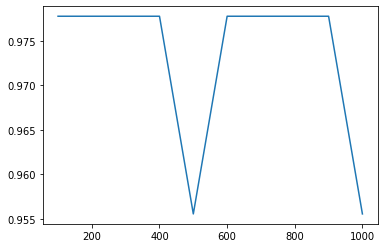

In [97]:
plt.plot(n_trees, results)
plt.show()

In [98]:
print("Média: ", np.mean(results))
results

Média:  0.9733333333333333


[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556]

#### Análise sobre Feature Selection
- Percebe-se que s_width tem pouca importância na classificação do modelo
- Iremos removê-lo e classificar com as outras 3 features

In [99]:
feature_imp = pd.DataFrame(importances, columns=df.iloc[:, :-1].columns).mean().sort_values(ascending=True)

No handles with labels found to put in legend.


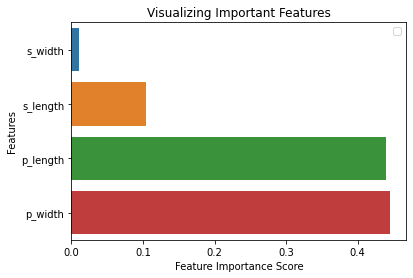

In [100]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [101]:
X = df[["s_length", "p_length", "p_width"]].iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [104]:
fs_results = []
fit_random_forest(fs_results)

In [105]:
print("Média: ", np.mean(fs_results))
fs_results

Média:  0.9777777777777776


[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]